# Plots
The following file if executed allow to generate all the plots for the FID distance on the AE-StyleGAN, in this way we can see the effect of the different parameters on the training network.

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot(title, x_arrays, y_arrays, labels, 
         colors=None, linestyles=None, markers=None, *, xlabel="", ylabel="", filename=None, legend_position="best", baseline=None, baseline_label=None, **plot_args):
    """
    Plot the data and create the plot image.
    For the 2 different FID first call one time for sample and later for rec
    Parameters
    ----------
    title: string, name of the plot
    x: array, x values
    y_arrays: list of array, differents series of data to plot
    labels: list, names of the data series
    """
    plt.figure()

    x = np.array(x_arrays[0])
    for i, xi in enumerate(x_arrays):
        if len(xi) > len(x):
            x = np.array(xi)
    
    ymin, ymax = 200, 0
    for i, (value, label) in enumerate(zip(y_arrays, labels)):
        linestyle = linestyles[i] if linestyles is not None else None
        marker = markers[i] if markers is not None else None
        color = colors[i] if colors is not None else None

        value = np.array(value)
        ymax = max(ymax, *value)
        ymin = min(ymin, *value)
        plt.plot(x[:len(value)], value, label=label, linestyle=linestyle, color=color, marker=marker, **plot_args)

    # if baseline is not None:
    #     ymax = max(ymax, baseline)
    #     plt.axhline(y = baseline, color = 'gray', linestyle = '--', linewidth=0.75, label=baseline_label)

    plt.title(title)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.ylim([ymin - 5, ymax + 5])

    plt.legend(loc=legend_position)
    #plt.savefig("./plots/" + (filename or title) + ".jpg", dpi = 150, bbox_inches = 'tight')
    plt.show()

def parseTXT_FID(jobid):
    filename = f"results/ablation_study_ae_style_gan/log_fid_{jobid}.txt"
    #print(filename)
    x = []
    y_sample = []
    y_rec_real = []
    with open(filename) as f:
        lines = f.readlines()
        header_lines = 2 #index of the list starts from 0

        for i, line in enumerate(lines):
            if i < header_lines:
                pass
            else:
                fields = line.split(";")
                x.append(int(fields[0]))
                y_sample.append(float(fields[1].split(":")[1]))
                y_rec_real.append(float(fields[3].split(":")[1]))
                #print(f"{x[i - header_lines]}  -  {y_sample[i - header_lines]} - {y_rec_real[i - header_lines]}")
    return x, y_sample, y_rec_real

### For download all the files needed for the ablation study

In [95]:
# Base Model
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270179/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270179.txt
# Encoder steps: 2, 5, 10
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270180/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270180.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270181/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270181.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270182/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270182.txt
# Weight on lambda_rec_d: 0.125, 0.5, 1.0
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270183/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270183.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270184/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270184.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270185/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270185.txt
# Regularization factors: 0.1024, 1.0, 5.0
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270186/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270186.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270187/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270187.txt
scp -r mla_group_13@legionlogin.polito.it:/home/mla_group_13/experiments_output/ae-stylegan_270188/ffhq_aegan_wplus_joint/log_fid.txt /Users/mattiadutto/Desktop/FaceFilter/results/ablation_study_ae_style_gan/log_fid_270188.txt


INiafaiVu

SyntaxError: invalid syntax (3104854923.py, line 2)

# Ablation Study on AE-StyleGAN
We decided to do a small ablation study on the AE-StyleGAN, as a starting point we took the pre-trained model at 11000 iterations and we conduce a ablation study on:
- Number of encoder steps
- Weight of lambda_rec_d
- Regularization factor r1


For the base model we took the trained model with the following configuration:
- Encoder steps: 1
- Lambda_rec_d:  0.25
- R1:            0.2048

All the models were trained for 1 day.


## Number of encoder steps
We decide to compare 1, 2, 5 and 10
You have to take in mind that higher values indicate longer training.

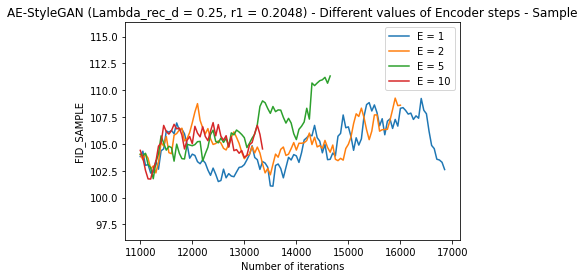

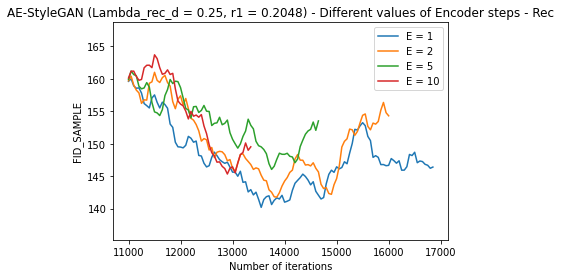

In [ ]:
x_1, sample_1, rec_1 = parseTXT_FID(270179)
x_2, sample_2, rec_2 = parseTXT_FID(270180)
x_5, sample_5, rec_5 = parseTXT_FID(270181)
x_10, sample_10, rec_10 = parseTXT_FID(270182)

plot(f"AE-StyleGAN (Lambda_rec_d = 0.25, r1 = 0.2048) - Different values of Encoder steps - Sample", 
     [x_1, x_2, x_5, x_10], 
     [sample_1, sample_2, sample_5, sample_10], 
     [f"E = {1}", f"E = {2}", f"E = {5}", f"E = {10}"],
     xlabel="Number of iterations", 
     ylabel="FID_SAMPLE",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-n-step-e-sample"
)

plot(f"AE-StyleGAN (Lambda_rec_d = 0.25, r1 = 0.2048) - Different values of Encoder steps - Rec", 
     [x_1, x_2, x_5, x_10], 
     [rec_1, rec_2, rec_5, rec_10], 
     [f"E = {1}", f"E = {2}", f"E = {5}", f"E = {10}"],
     xlabel="Number of iterations", 
     ylabel="FID_REC",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-n-step-e-rec"
)

## Lamba regularization factor
We decide to compare 0.125, 0.25 (base model), 0.5 and 1.0

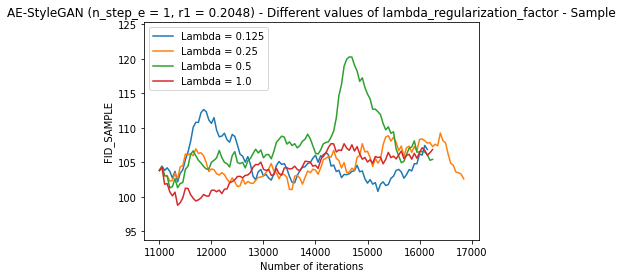

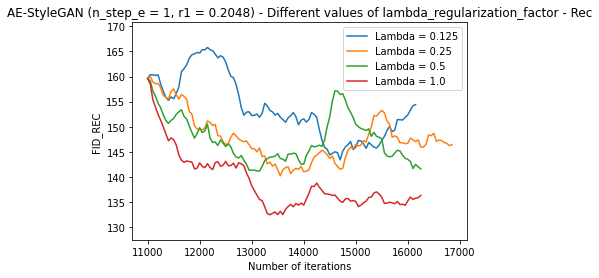

In [ ]:
x_0_125, sample_0_125, rec_0_125 = parseTXT_FID(270183)
x_0_25, sample_0_25, rec_0_25 = parseTXT_FID(270179)
x_0_5, sample_0_5, rec_0_5 = parseTXT_FID(270184)
x_1, sample_1, rec_1 = parseTXT_FID(270185)


plot(f"AE-StyleGAN (n_step_e = 1, r1 = 0.2048) - Different values of lambda_regularization_factor - Sample", 
     [x_0_125, x_0_25, x_0_5, x_1], 
     [sample_0_125, sample_0_25, sample_0_5, sample_1], 
     [f"Lambda = {0.125}", f"Lambda = {0.25}", f"Lambda = {0.5}", f"Lambda = {1.0}"],
     xlabel="Number of iterations", 
     ylabel="FID_SAMPLE",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-lambda-regularization-factor-sample"
)

plot(f"AE-StyleGAN (n_step_e = 1, r1 = 0.2048) - Different values of lambda_regularization_factor - Rec", 
     [x_0_125, x_0_25, x_0_5, x_1], 
     [rec_0_125, rec_0_25, rec_0_5, rec_1], 
     [f"Lambda = {0.125}", f"Lambda = {0.25}", f"Lambda = {0.5}", f"Lambda = {1.0}"],
     xlabel="Number of iterations", 
     ylabel="FID_REC",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-lambda-regularization-factor-rec"
)

## Regularization factor
We decide to compare 0.1024, 0.2048 (base model), 1.0 and 5.0

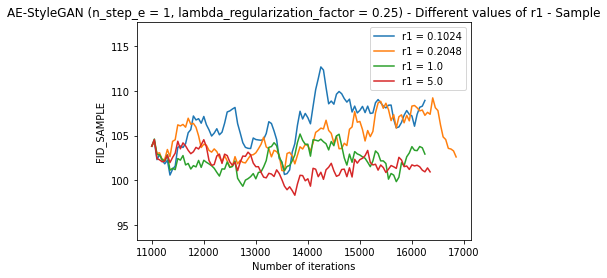

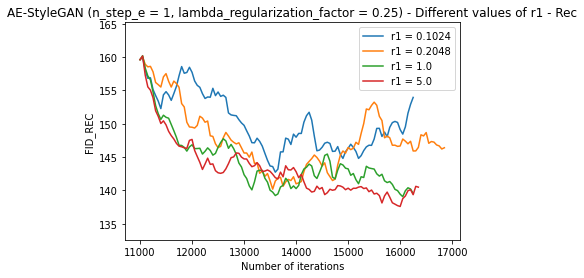

In [ ]:
x_0_1024, sample_0_1024, rec_0_1024 = parseTXT_FID(270186)
x_0_2048, sample_0_2048, rec_0_2048 = parseTXT_FID(270179)
x_1, sample_1, rec_1 = parseTXT_FID(270187)
x_5, sample_5, rec_5 = parseTXT_FID(270188)

plot(f"AE-StyleGAN (n_step_e = 1, lambda_regularization_factor = 0.25) - Different values of r1 - Sample", 
     [x_0_1024, x_0_2048, x_1, x_5], 
     [sample_0_1024, sample_0_2048, sample_1, sample_5], 
     [f"r1 = {0.1024}", f"r1 = {0.2048}", f"r1 = {1.0}", f"r1 = {5.0}"],
     xlabel="Number of iterations", 
     ylabel="FID_SAMPLE",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-r1-sample"
)

plot(f"AE-StyleGAN (n_step_e = 1, lambda_regularization_factor = 0.25) - Different values of r1 - Rec", 
     [x_0_1024, x_0_2048, x_1, x_5], 
     [rec_0_1024, rec_0_2048, rec_1, rec_5], 
     [f"r1 = {0.1024}", f"r1 = {0.2048}", f"r1 = {1.0}", f"r1 = {5.0}"],
     xlabel="Number of iterations", 
     ylabel="FID_REC",
     #baseline=75, baseline_label="SGD baseline",
     filename="ablation-r1-rec"
)